In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix


Using TensorFlow backend.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 4608 bytes


In [0]:
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
inputs_x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
inputs_y = df['variety']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
inputs_x_scaler = scaler.fit_transform(inputs_x.values)
df_scaler = pd.DataFrame(inputs_x_scaler, index=inputs_x.index, columns=inputs_x.columns)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaler.values, inputs_y, test_size=0.2, random_state=42)

In [0]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [0]:
model = Sequential()
model.add(Dense(100,input_shape=(4,),activation='relu'))
model.add(Dense(3, activation='softmax'))
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


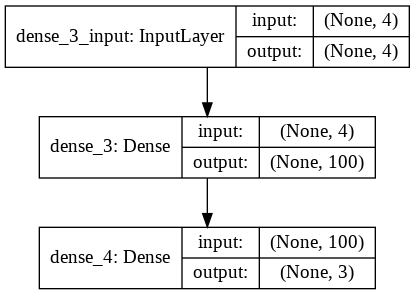

In [24]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')

In [25]:
trained_model = model.fit(X_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
120/120 [==============================] - 0s 421us/step - loss: 1.1411 - accuracy: 0.2250
Epoch 2/300
120/120 [==============================] - 0s 94us/step - loss: 0.9914 - accuracy: 0.5250
Epoch 3/300
120/120 [==============================] - 0s 91us/step - loss: 0.8044 - accuracy: 0.7167
Epoch 4/300
120/120 [==============================] - 0s 90us/step - loss: 0.6702 - accuracy: 0.7667
Epoch 5/300
120/120 [==============================] - 0s 89us/step - loss: 0.5798 - accuracy: 0.8083
Epoch 6/300
120/120 [==============================] - 0s 101us/step - loss: 0.5169 - accuracy: 0.8167
Epoch 7/300
120/120 [==============================] - 0s 104us/step - loss: 0.4706 - accuracy: 0.8333
Epoch 8/300
120/120 [==============================] - 0s 94us/step - loss: 0.4379 - accuracy: 0.8333
Epoch 9/300
120/120 [==============================] - 0s 91us/step - loss: 0.4121 - accuracy: 0.8333
Epoch 10/300
120/120 [==============================] - 0s 89us/step - loss: 0.

In [0]:
test_result = model.evaluate(X_test, y_test, verbose=0)

In [27]:
print("Test score: {}".format(test_result[0]))
print("Test accuracy: {:.2f}".format(test_result[1]))

Test score: 0.02975640259683132
Test accuracy: 1.00


In [0]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [29]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [0]:
df_result = pd.DataFrame.from_dict(trained_model.history)

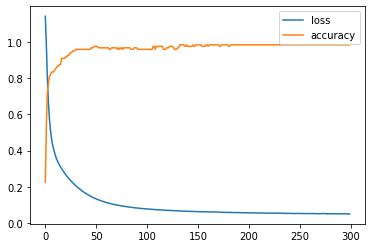

In [31]:
df_result.plot()